# L12 - Decision Trees

Importando as bibliotecas

In [1985]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

Atribuindo a um DataFrame os dados do arquivo breast_cancer.csv

In [1986]:
df = pd.read_csv('https://raw.githubusercontent.com/jefferson-oliva/databases/main/breast_cancer.csv')
df.head()

,sample_id,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


Verificando a quantidade de linhas e colunas do DataFrame

In [1987]:
df.shape

(569, 32)

Verificando quais os valores distintos da coluna "diagnosis"

In [1988]:
df['diagnosis'].unique()

array(['malignant', 'benign'], dtype=object)

Substituindo os valores das classes benign e malignant para valores numéricos

In [1989]:
d = {'benign': 0, 
     'malignant': 1}

df['diagnosis'] = df['diagnosis'].map(d)

Verificando os nomes das colunas/características do DataFrame

In [1990]:
df.columns

Index(['sample_id', 'mean_radius', 'mean_texture', 'mean_perimeter',
       'mean_area', 'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension',
       'diagnosis'],
      dtype='object')

Atribuindo os valores e labels as varáveis X e y

In [1991]:
# características escolhidas: mean_texture, mean_area, worst_texture e worst_area
features = [2, 4, 22, 24]

X = df.iloc[:, features].values
y = df['diagnosis'].values

Armazenando os dados de treino e teste

In [1992]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=123, stratify=y)

Verificando a divisão dos dados de treino e teste

In [1993]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [357 212]
Labels counts in y_train: [285 170]
Labels counts in y_test: [72 42]


Criando a pipeline

In [1994]:
pipe = Pipeline([
    ('reduce_dim', PCA(n_components=4)),
    ('decision_tree', DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1))
])

Realizando o treinamento

In [1995]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('reduce_dim', PCA(n_components=4)),
                ('decision_tree',
                 DecisionTreeClassifier(criterion='entropy', max_depth=4,
                                        random_state=1))])

Verificando a acurácia dos dados de treino

In [1996]:
y_train_pred = pipe.predict(X_train)
accuracy_score(y_train, y_train_pred)

0.9604395604395605

Verificando a acurácia dos dados de teste

In [1997]:
y_test_pred = pipe.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.9473684210526315

Atribundo os parâmetros ao Gridsearch

In [1998]:
tree__criterion = ['gini', 'entropy']
max_depth = [2, 3, 4]
n_components = [1, 2, 3, 4]
param_grid = {
    'reduce_dim__n_components': n_components,
    'decision_tree__criterion': tree__criterion,
    'decision_tree__max_depth': max_depth
}

grid = GridSearchCV(pipe, cv=2, n_jobs=1, param_grid=param_grid, scoring='accuracy')

Realizando o treinamento

In [1999]:
grid.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('reduce_dim', PCA(n_components=4)),
                                       ('decision_tree',
                                        DecisionTreeClassifier(criterion='entropy',
                                                               max_depth=4,
                                                               random_state=1))]),
             n_jobs=1,
             param_grid={'decision_tree__criterion': ['gini', 'entropy'],
                         'decision_tree__max_depth': [2, 3, 4],
                         'reduce_dim__n_components': [1, 2, 3, 4]},
             scoring='accuracy')

Exibindo os resultados

In [2000]:
print(grid.cv_results_)

{'mean_fit_time': array([0.00199568, 0.0009979 , 0.00149524, 0.00149596, 0.00099766,
       0.0014956 , 0.00149763, 0.00149393, 0.00099969, 0.00199497,
       0.00164568, 0.00149655, 0.00099814, 0.00199461, 0.00149608,
       0.00149608, 0.00199437, 0.00249314, 0.00199544, 0.00249434,
       0.00149632, 0.00149715, 0.00149608, 0.00199723]), 'std_fit_time': array([1.19209290e-07, 3.57627869e-07, 4.99129295e-04, 4.98890877e-04,
       5.96046448e-07, 4.99248505e-04, 5.00798225e-04, 4.95910645e-04,
       2.14576721e-06, 3.57627869e-07, 6.48617744e-04, 4.99010086e-04,
       1.19209290e-07, 7.15255737e-07, 4.97579575e-04, 4.99010086e-04,
       4.76837158e-07, 4.98056412e-04, 3.57627869e-07, 4.98056412e-04,
       4.98294830e-04, 4.98890877e-04, 4.98771667e-04, 9.93728638e-04]), 'mean_score_time': array([0.00099695, 0.00049841, 0.00049925, 0.00049865, 0.00099695,
       0.        , 0.00099599, 0.00099719, 0.00049806, 0.00049853,
       0.00049889, 0.00099707, 0.00099671, 0.        , 0.000

Exibindo as médias do conjunto de dados de teste

In [2001]:
grid.cv_results_['mean_test_score']

array([0.88132777, 0.87912513, 0.88132777, 0.87912513, 0.86594791,
       0.92748667, 0.89235065, 0.88576204, 0.8857717 , 0.92968931,
       0.88575238, 0.88573306, 0.88132777, 0.88132777, 0.88132777,
       0.88132777, 0.89017698, 0.90996213, 0.89455329, 0.88795502,
       0.88356905, 0.92750599, 0.91430945, 0.89889095])

Exibindo os melhores parâmetros

In [2002]:
print(grid.best_score_)
print(grid.best_params_)

0.9296893113841873
{'decision_tree__criterion': 'gini', 'decision_tree__max_depth': 4, 'reduce_dim__n_components': 2}


Verificando a acurácia dos dados de teste

In [2003]:
clf = grid.best_estimator_
y_test_pred = clf.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.9473684210526315

Exibindo a árvore de decisão

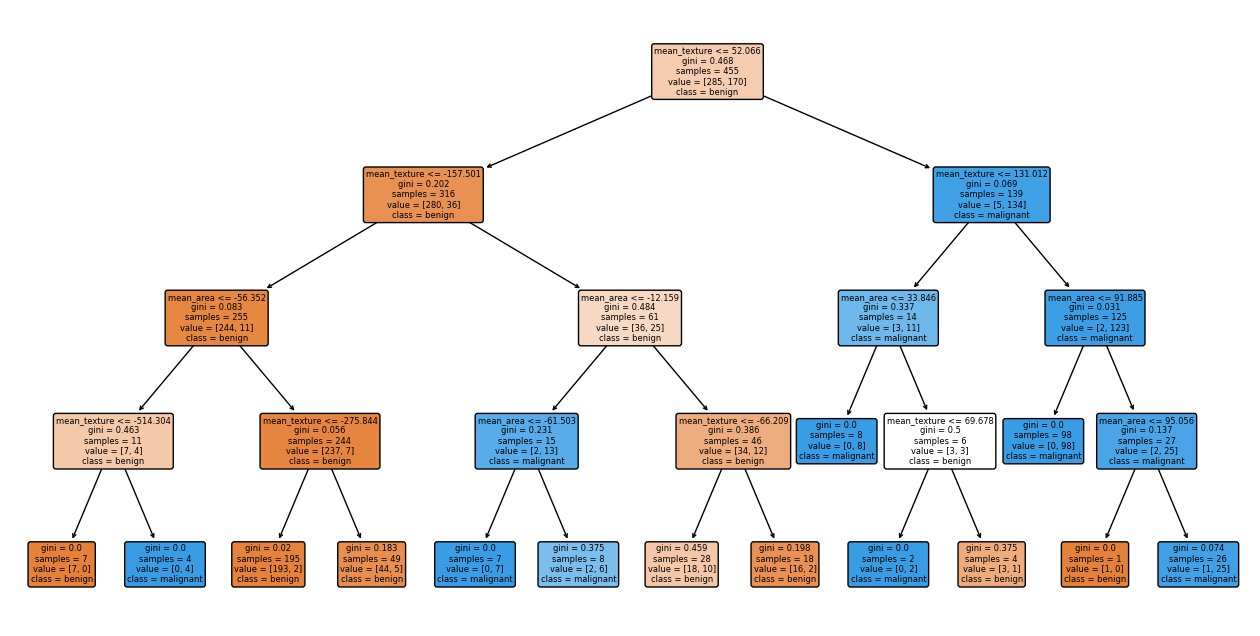

In [2004]:
classes = ['benign', 'malignant'] # 0 e 1
features = df.columns[[2, 4, 22, 24]] # mean_texture, mean_area, worst_texture e worst_area

plt.figure(figsize=(16, 8))

plot_tree(clf['decision_tree'], filled=True, rounded=True,
          class_names=classes,
          feature_names=features,
          fontsize=6
         ) 

plt.show()

Definindo a amostra única

In [2005]:
print(np.shape(X_test))
print(np.shape(y_test))

X_test1 = X_test[1,:]
y_test1 = y_test[1]

print(np.shape(X_test1))
print(np.shape(y_test1))

X_test1 = np.reshape(X_test1,(1,-1))
y_test1 = np.reshape(y_test1,(1))

print(np.shape(X_test1))
print(np.shape(y_test1))

(114, 4)
(114,)
(4,)
()
(1, 4)
(1,)


Verificando o resultado da amostra única

In [2006]:
y_test1_pred  = clf.predict(X_test1)
print("Classe: ", y_test1_pred)
print("Acurácia: ", accuracy_score(y_test1, y_test1_pred))
print("Características: ", X_test1)

Classe:  [0]
Acurácia:  1.0
Características:  [[ 13.66 658.8   17.24 862.  ]]


### Interpretação da amostra:

Valores das características:
- mean_texture = 13.66
- mean_area = 658.8
- worst_texture = 17.24
- worst_area = 862.

Condicionais:

- **mean_texture** é menor ou igual a 52.066? **Sim**, então desce o nível para o lado esquerdo.
    
- **mean_texture** é menor ou igual a -157.501? **Não**, então desce o nível para o lado direito.
    
- **mean_area** é menor ou igual a -12.159? **Não**, então desce o nível para o lado direito.
    
- **mean_texture** é menor ou igual a -66.209? **Não**, então desce o nível para o lado direito.

Resultado:

class = benign (0)